<a id="top"></a>
# Long Period TESS Targets with Kepler Counterparts
***


## Prerequisites
- Python syntax
- Something about exoplanet transits, link to free resource

## Learning Goals

By the end of this tutorial, you will:

- 

To use as a guideline:
"Set a minimum threshold for orbital period (should be long-period orbits, greater than 6mos). Find all TESS 20-seconds targets that have data for these Kepler TCEs to create an even longer baseline."

## Introduction
The [Kepler initial and follow-on (K2) missions confirmed over 2,600 exoplanets](https://exoplanets.nasa.gov/keplerscience/) and contributed to an unprecedented exposion of knowledge about planetary systems in our galaxy. In addition to confirmed exoplanets, Kepler identified thousands more potential planetary candidates, referred to as Kepler Objects on Interest (KOI's). 

The Transiting Exoplanet Survey Satellite (TESS) began its observations just before the completion of the K2 mission; there may be long-period (greater than 6 months) exoplanets whose transits were observed by both missions. By combinining observations from both missions, we could potentially view multiple transits and confirm the existence of new exoplanets. 

Possible transits observed by Kepler are called Threshold Crossing Events, or TCEs. More specifically, according to the [NASA Exoplanet Archive documentation](https://exoplanetarchive.ipac.caltech.edu/docs/Kepler_TCE_docs.html), 

>"A Threshold-Crossing Event (TCE) is a sequence of transit-like features in the flux time series of a given target that resembles the signature of a transiting planet to a sufficient degree that the target is passed on for further analysis."

The workflow for this notebook consists of:
* [Main Content](#Main-Content)
    * [Loading Data](#Loading-Data)
    * [File and Data Information](#File-and-Data-Information)
* [Visualization](#Visualization)
* [Exercises](#Exercises)
* [Additional Resources](#Additional-Resources)

## Imports
Describe the main packages we're using here and their use-case for this notebook. If there's something unusual, explain what the library is, and why we need it.
- *numpy* to handle array functions
- *astropy.io fits* for accessing FITS files
- *astropy.table Table* for creating tidy tables of the data
- *matplotlib.pyplot* for plotting data

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits
from astropy.table import Table
from astroquery.mast import Mast
from astroquery.mast import Observations


# Added by JRK
import requests
from astropy.io import ascii
import lightkurve as lk
import astropy.units as u

***

# Try for known exoplanets instead?

In [5]:
# CoRot-2, TESS has 3
search_result=lk.search_lightcurve('55 Cnc e')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector,2020,DIAMANTE,1800,332064670,0.0
1,TESS Sector 21,2020,SPOC,120,332064670,0.0
2,TESS Sector 44,2021,SPOC,20,332064670,0.0
3,TESS Sector 44,2021,SPOC,120,332064670,0.0
4,TESS Sector 46,2021,SPOC,20,332064670,0.0
5,TESS Sector 46,2021,SPOC,120,332064670,0.0


# Search lightkurve on the region that corresponds to Kepler's FOV

In [53]:
%%time
# Specifying exptime='fast' makes this a lot lot lot slower. Too large radius, also too slow.
search_result=lk.search_lightcurve('19:22:40 +44:30:00',
                                   radius=3600,mission='TESS')                        
search_result

KeyboardInterrupt: 

In [30]:
# Number of unique target names in search results
len(np.unique(search_result.target_name))

99

In [45]:
# Number of unique target names in search results
uniquedist=np.unique(search_result.distance)
for i,dist in enumerate(uniquedist):
    missions=np.unique(search_result.mission[np.where(search_result.distance==dist)])
    print(dist,missions)

30.000354887421892 arcsec ['TESS Sector 14' 'TESS Sector 15' 'TESS Sector 40' 'TESS Sector 41']
30.000361601142373 arcsec ['TESS Sector 54' 'TESS Sector 55']
34.616661626796216 arcsec ['TESS Sector 14' 'TESS Sector 15' 'TESS Sector 40' 'TESS Sector 41'
 'TESS Sector 54' 'TESS Sector 55']
58.71195618774269 arcsec ['TESS Sector 54' 'TESS Sector 55']
58.71195680711671 arcsec ['TESS Sector 14' 'TESS Sector 15' 'TESS Sector 40' 'TESS Sector 41']
61.95413169479124 arcsec ['TESS Sector 15']
61.954145771599286 arcsec ['TESS Sector 14']
64.21832769658279 arcsec ['TESS Sector 14' 'TESS Sector 15' 'TESS Sector 40' 'TESS Sector 41'
 'TESS Sector 54' 'TESS Sector 55']
78.7021639550935 arcsec ['TESS Sector 14' 'TESS Sector 15']
88.32726364445864 arcsec ['TESS Sector 14' 'TESS Sector 15' 'TESS Sector 40' 'TESS Sector 41'
 'TESS Sector 54' 'TESS Sector 55']
108.46650133030053 arcsec ['TESS Sector 14' 'TESS Sector 15' 'TESS Sector 40' 'TESS Sector 41'
 'TESS Sector 54' 'TESS Sector 55']
112.86640399369

## Load full table of Kepler Threshold Crossing Events, or TCEs and filter by period

https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html#tce
```

In [56]:
# Load the TCE table as an astropy table.
# For some reason, this worked earlier, and now does not. Downloaded a copy of the dr24 version and loaded it locally. NOt ideal.
#tab=Table.read('https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=q1_q17_dr25_tce',format='ascii.csv')
tab=Table.read('./q1_q17_dr24_tce_2023.05.29_11.07.52.csv',format='ascii.csv',comment='#')
len(tab)

20367

In [57]:
# View the full list of column names
# More info here: https://exoplanetarchive.ipac.caltech.edu/docs/API_tce_columns.html 
tab.columns

<TableColumns names=('rowid','kepid','tce_plnt_num','tce_rogue_flag','tce_delivname','rowupdate','tce_datalink_dvs','tce_datalink_dvr','tce_period','tce_period_err','tce_time0bk','tce_time0bk_err','tce_time0','tce_time0_err','tce_ror','tce_ror_err','tce_dor','tce_dor_err','tce_incl','tce_incl_err','tce_impact','tce_impact_err','tce_duration','tce_duration_err','tce_ingress','tce_ingress_err','tce_depth','tce_depth_err','tce_eccen','tce_eccen_err','tce_longp','tce_longp_err','tce_limbdark_mod','tce_ldm_coeff1','tce_ldm_coeff2','tce_ldm_coeff3','tce_ldm_coeff4','tce_num_transits','tce_trans_mod','tce_full_conv','tce_model_snr','tce_model_chisq','tce_model_dof','tce_robstat','tce_dof1','tce_dof2','tce_chisq1','tce_chisq2','tce_chisqgofdof','tce_chisqgof','tce_prad','tce_prad_err','tce_sma','tce_sma_err','tce_eqt','tce_eqt_err','tce_insol','tce_insol_err','tce_nkoi','tce_ioflag','tce_quarters','tce_steff','tce_steff_err','tce_slogg','tce_slogg_err','tce_smet','tce_smet_err','tce_sradius','

The NASA Exoplanet Archive provides detailed information about the [Data Columns in the Kepler TCE Table](https://exoplanetarchive.ipac.caltech.edu/docs/API_tce_columns.html). Some of the most important columns for us will be:
- kepid, Kepler identification number, which we can use when searching the MAST Archive.
- tce_period, the orbital period in days.

JRK - DR24 has an "autovetter" parameter that could help us identify likely planet candidates instead of false positives.

In [58]:
# Only include those table rows with TCE period greater than 180 days
tab=tab[tab['tce_period']>180]
len(tab)

1375

In [59]:
tab.pprint()

rowid  kepid   tce_plnt_num ... tce_dikco_msky tce_dikco_msky_err
----- -------- ------------ ... -------------- ------------------
    5  1164109            1 ...         15.207             0.0893
   41  2307197            1 ...         5.0511              0.365
   62  2721129            1 ...        0.83562               0.57
   63  2721129            2 ...        0.15984               0.64
   94  2439798            1 ...            0.0               -1.0
  118  2988768            1 ...            0.0               -1.0
  130  1867078            1 ...            0.0               -1.0
  141  2307206            1 ...            0.0               -1.0
  142  2307206            2 ...        0.19003             0.0871
  167  2831048            1 ...         2.3961              0.171
  ...      ...          ... ...            ...                ...
20248 12020252            1 ...         7.5142               1.17
20254 12117945            1 ...            0.0               -1.0
20258 1220

In [60]:
str(tab['kepid'][0])

'1164109'

## Find all TESS 20-second targets for these Kepler TCEs

In [63]:
obs_table = Observations.query_object('KIC 1164109')
obs_table.pprint()

intentType obs_collection provenance_name ...   obsid        distance     
---------- -------------- --------------- ... --------- ------------------
   science           TESS            SPOC ...  27463635                0.0
   science           TESS            SPOC ...  62431369                0.0
   science           TESS            SPOC ...  62870781                0.0
   science           TESS            SPOC ...  92616912                0.0
   science           TESS            SPOC ...  95133363                0.0
   science           TESS            SPOC ...  62349769 427.97454412052343
   science           TESS            SPOC ...  62793217 427.97454412052343
   science           TESS            SPOC ...  91546989 427.97454412052343
   science           TESS            SPOC ...  93771903 427.97454412052343
   science           TESS            SPOC ...  27447307  534.1142946016103
       ...            ...             ... ...       ...                ...
   science           HLSP

In [62]:
obs_table['target_name']

TESS FFI
TESS FFI
TESS FFI
TESS FFI
TESS FFI
137316027
137316027
1876944736
1876944736
1876944736
1876944736


### Lightkurve?

In [68]:
#search_result=lk.search_lightcurve('KIC 1164109') # Only returns Kepler light kurves.
# 291.65265, 36.89502
search_result=lk.search_lightcurve('291.65265, 36.89502')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr001164109,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr001164109,0.0
2,Kepler Quarter 02,2009,Kepler,60,kplr001164109,0.0
3,Kepler Quarter 02,2009,Kepler,1800,kplr001164109,0.0
4,Kepler Quarter 03,2009,Kepler,1800,kplr001164109,0.0
5,Kepler Quarter 04,2010,Kepler,1800,kplr001164109,0.0
6,Kepler Quarter 05,2010,Kepler,1800,kplr001164109,0.0
7,Kepler Quarter 06,2010,Kepler,1800,kplr001164109,0.0
8,Kepler Quarter 07,2010,Kepler,1800,kplr001164109,0.0


In [69]:
# Load 'em all. Where does it "go"?
lc_collection = search_result.download_all()

/opt/conda/envs/tess/lib/python3.8/site-packages/lightkurve/collections.py:213: LightkurveWarning: The following columns will be excluded from stitching because the column types are incompatible: {'sap_flux', 'sap_bkg_err', 'sap_bkg'}
  warnings.warn(


<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

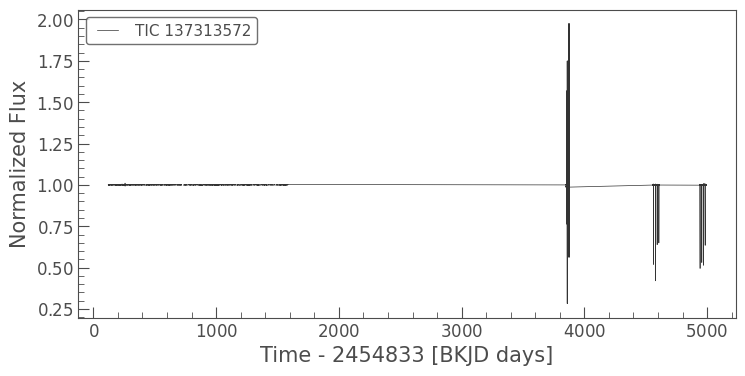

In [72]:
lc_stitched = lc_collection.stitch()
lc_stitched.plot()

In [ ]:
# Can specify author='Kepler' and author='TESS'
none=True
while none:
    # None from 0 to 100
    for i in np.arange(0,100):
        search_result=lk.search_lightcurve(str(tab['kepid'][i]),author='TESS')
        if len(search_result)>1:
            none=False

Where possible (if the code supports it), use code examples that visually display the data in the tutorial. For example, if you are showing an object such as a Table, display a preview of the table:

In [ ]:
yourProd[0:5]

In [ ]:
# Download the products
output = Observations.download_products(yourProd, mrp_only=False, cache=False)
output

Explain pertinent details about the file you've just downloaded. For example, if working with Kepler light curves, explain what's in the different file extensions:

```
- No. 0 (Primary): This HDU contains metadata related to the entire file.
- No. 1 (Light curve): This HDU contains a binary table that holds data like
  flux measurements and times. We will extract information from here when we
  define the parameters for the light curve plot.
- No. 2 (Aperture): This HDU contains the image extension with data collected
  from the aperture. We will also use this to display a bitmask plot that
  visually represents the optimal aperture used to create the SAP_FLUX column in
  HDU1.

```

In [ ]:
file = output['Local Path'][0]
print('The HDU list of our output file:\n')
print(fits.info(file))

data = fits.getdata(file, 1)['FLUX']
time = fits.getdata(file, 1)['TIME']

## Visualization

When presenting any visuals and/or plots from the data, make sure you are using color palettes that are color-blind friendly and using language that keeps accessibility in mind. The most common form of color vision deficiency involves differentiating between red and green, so avoiding colormaps with both red and green will avoid many problems in general. Use descriptive keywords not pertaining to the color of the object you are referring to. It is good practice to make your plots and images large enough to ensure that important details are not hard to see. On the same note, make sure that tick labels, legends, and other plot notations are not too small, and make sure they are descriptive enough that the user can understand what is being represented by the data. 

Let's plot the first four images of the Kepler TPF we just downloaded to see where the center of the PSF is located...

In [ ]:
imgs = 4

fig, axs = plt.subplots(1, imgs, figsize=(20, 20))

for idx in range(0, imgs):
    # Plotting
    axs[idx].imshow(data[idx], cmap='bone', origin='lower')
    
    # Formatting
    axs[idx].set_title(f'Image #{idx}', fontsize=25)
    axs[idx].tick_params(axis='both', which='major', labelsize=20)

Looks like it's typically located around (x,y)=(4,4). Let's gather all the images and extract the flux at (4,4) from each of them to patch our lightcurve together...

In [ ]:
lightcurve = []

for idx in range(0, len(data)):
    
    flux = data[idx][4, 4]
    lightcurve.append(flux)

In [ ]:
# Plotting
plt.figure(1, figsize=(10, 6))
plt.plot(time, lightcurve)

# Formatting
obj = fits.getheader(file)['OBJECT']
plt.title(f'Object: {obj}', fontsize=25)
plt.xlabel('Time - 2454833 (BKJD days)', fontsize=20)
plt.ylabel('Flux (e-/s)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

## Exercises
Exercises are optional, but encouraged. Exercises can be woven into the main content of your tutorial, or appear in their own section toward the end of the tutorial. Final exercises can be more challenging, similar to homework problems. They can be minimal or take as long as 30 minutes to an hour to complete. If you do have one or more exercises in your tutorial, be sure to leave a blank code cell underneath each to show the reader that they're meant to try out their new skill right there. You may also want to include a "solutions" notebook next to your main notebook for the reader to check their work after they have finished their attempt.

## Additional Resources

This section is optional. Try to weave resource links into the main content of your tutorial so that they are falling in line with the context of your writing. For resources that do not fit cleanly into your narrative, you may include an additional resources section at the end of your tutorial. Usually a list of links using Markdown bullet list plus link format is appropriate:

- [MAST API](https://mast.stsci.edu/api/v0/index.html)
- [Kepler Archive Page (MAST)](https://archive.stsci.edu/kepler/)
- [Kepler Archive Manual](https://archive.stsci.edu/kepler/manuals/archive_manual.pdf)
- [Exo.MAST website](https://exo.mast.stsci.edu/)

## Citations
Provide your reader with guidelines on how to cite open source software and other resources in their own published work.

```
If you use `astropy` or `lightkurve` for published research, please cite the
authors. Follow these links for more information about citing `astropy` and
`lightkurve`:

* [Citing `astropy`](https://www.astropy.org/acknowledging.html)
* [Citing `lightkurve`](http://docs.lightkurve.org/about/citing.html)

```

## About this Notebook
Let the world know who the author of this great tutorial is! If possible and appropriate, include a contact email address for users who might need support (for example, `archive@stsci.edu`). You can also optionally include keywords, your funding source, or a last update date in this section.

**Author(s):** Jessie Blogs, Jenny V. Medina, Thomas Dutkiewicz <br>
**Keyword(s):** Tutorial, lightkurve, kepler, introduction, template <br>
**Last Updated:** Aug 2022 <br>
**Next Review:** Mar 2023
***
[Top of Page](#top)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/> 